In [1]:
def toLower(s):
    return s.replace(' ', '').lower()

def appPotrebEncode(x):
    if x == 0:
        return 0
    return 1

def toZeroOne(x):
    if x <= 0:
        return 0
    return 1

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path = './data/'
old_path = 'OldAgg/'
filenameA = 'aggregates'
filenameT = 'transactions'

In [3]:
df = pd.read_csv(path + old_path + filenameA + '.csv')

df = df.drop(df[df.app_potreb_cnt.isnull()].index)
print(df.shape)
to_drop = []
df.drop(to_drop, axis=1, inplace=True)
# If more then 30% info is nan
df = df.loc[:, (df.isnull().sum(axis=0)/len(df.app_potreb_cnt) <= 0.3)]
df.shape

(113352, 220)


(113352, 111)

In [4]:
#Transforming Data
df['report_date_t'] = pd.to_datetime(df.report_date).astype(int) / 10**9
df.shape

(113352, 112)

In [5]:
# GENERATING NEW DF :: TIMEGAP = 1

df = df.sort_values(['client_id', 'report_date_t'])
df['y'] = [df.iloc[i].app_potreb_cnt.item() - df.iloc[i-1].app_potreb_cnt.item() if df.iloc[i].client_id.item() == df.iloc[i-1].client_id.item() else None for i in range(1, df.shape[0])] + [None]
data = df.drop(df[df.y.isnull()].index)
data.head(20)

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,total_num_cards,cnt_active,cnt_cur,first_opened,...,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor,report_date_t,y
95011,0,2019-08-01 00:00:00,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.564618e+09,0.0
60502,0,2019-09-01 00:00:00,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.567296e+09,0.0
153434,0,2019-10-01 00:00:00,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.569888e+09,0.0
102743,0,2019-11-01 00:00:00,1.0,3.0,3.0,3.0,2.0,1.0,0.0,3.258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.572566e+09,0.0
83932,0,2019-12-01 00:00:00,1.0,3.0,4.0,4.0,2.0,1.0,0.0,4.258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.575158e+09,0.0
140742,0,2020-01-01 00:00:00,2.0,4.0,6.0,6.0,2.0,1.0,0.0,5.258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.577837e+09,0.0
145559,0,2020-02-01 00:00:00,0.0,3.0,6.0,6.0,2.0,1.0,0.0,6.258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.580515e+09,0.0
49228,0,2020-03-01 00:00:00,2.0,4.0,7.0,8.0,2.0,1.0,0.0,7.258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.583021e+09,0.0
6085,0,2020-04-01 00:00:00,1.0,3.0,7.0,9.0,2.0,1.0,0.0,8.258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.585699e+09,0.0
170930,0,2020-05-01 00:00:00,1.0,4.0,7.0,10.0,2.0,1.0,0.0,9.258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.588291e+09,0.0


In [6]:
data = df.drop(df[df.y.isnull()].index)

In [7]:
dfTrans = pd.read_csv(path + filenameT + '.csv')
dfTrans['report_date_t'] =  pd.to_datetime(dfTrans.last_day_month).astype(int) / 10**9 + 24*60*60
dfTrans.last_day_month = pd.to_datetime( pd.to_datetime(dfTrans.last_day_month).astype(int) / 10**9 + 24*60*60, unit='s' )

dfTrans = dfTrans.sort_values(['client_id', 'report_date_t'])

dfTrans.drop('mcc_group', axis=1, inplace=True)
dfTrans = dfTrans.groupby(['client_id', 'report_date_t'], as_index=False).mean()

data = pd.merge(data, dfTrans, on=['client_id','report_date_t'])
data.head(20)

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,total_num_cards,cnt_active,cnt_cur,first_opened,...,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor,report_date_t,y,att_sum,att_cnt,att_sum_min,att_sum_max,att_sum_avg
0,0,2019-10-01 00:00:00,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.258,...,NaN,NaN,NaN,1.569888e+09,0.0,18243.500000,12.666667,1032.833333,4906.833333,2593.437571
1,0,2019-11-01 00:00:00,1.0,3.0,3.0,3.0,2.0,1.0,0.0,3.258,...,NaN,NaN,NaN,1.572566e+09,0.0,6598.696000,11.000000,196.412000,1020.800000,582.392350
2,0,2019-12-01 00:00:00,1.0,3.0,4.0,4.0,2.0,1.0,0.0,4.258,...,NaN,NaN,NaN,1.575158e+09,0.0,17745.462500,19.000000,135.200000,2910.562500,1078.791567
3,0,2020-01-01 00:00:00,2.0,4.0,6.0,6.0,2.0,1.0,0.0,5.258,...,NaN,NaN,NaN,1.577837e+09,0.0,19918.983333,13.333333,200.500000,6724.500000,1062.014530
4,0,2020-02-01 00:00:00,0.0,3.0,6.0,6.0,2.0,1.0,0.0,6.258,...,NaN,NaN,NaN,1.580515e+09,0.0,11511.206667,22.000000,103.333333,1319.333333,485.688067
5,0,2020-03-01 00:00:00,2.0,4.0,7.0,8.0,2.0,1.0,0.0,7.258,...,NaN,NaN,NaN,1.583021e+09,0.0,18060.212000,19.400000,94.180000,4642.112000,708.009736
6,0,2020-04-01 00:00:00,1.0,3.0,7.0,9.0,2.0,1.0,0.0,8.258,...,NaN,NaN,NaN,1.585699e+09,0.0,17713.380000,26.000000,71.000000,3783.000000,881.116326
7,0,2020-05-01 00:00:00,1.0,4.0,7.0,10.0,2.0,1.0,0.0,9.258,...,NaN,NaN,NaN,1.588291e+09,0.0,10759.500000,23.000000,218.750000,2224.250000,521.543137
8,0,2020-06-01 00:00:00,1.0,3.0,7.0,11.0,2.0,1.0,0.0,10.258,...,NaN,NaN,NaN,1.590970e+09,0.0,23120.936250,14.000000,209.625000,5807.167500,1178.933978
9,0,2020-07-01 00:00:00,1.0,3.0,6.0,12.0,2.0,1.0,0.0,11.258,...,NaN,NaN,NaN,1.593562e+09,0.0,13457.162857,12.285714,109.905714,4875.055714,1021.930515


In [8]:
#Encoding
for p in data.select_dtypes(include=['object']):
    data[p] = [toLower(str(x)) for x in data[p]]
    
for p in data.select_dtypes(include=['object']):
    names = list(set(data[p]))
    data[p] = [names.index(x) for x in data[p]]

data.y = [toZeroOne(x) for x in data.y]
data.y.sum()

1951

In [9]:
for cl in data.columns:
    data[cl] = data[cl].fillna(data[cl].mean())

In [11]:
data['report_date_sin'] = np.sin(data.report_date)
data.to_csv(path + 'aggnewdataprep' + '.csv')

In [12]:
############# MODELS ###############
from random import shuffle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from xgboost import XGBClassifier, plot_importance
from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, auc, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, roc_curve, plot_roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.cluster import DBSCAN

from scipy import stats


DF :: (94869, 119)


<AxesSubplot:xlabel='y', ylabel='Count'>

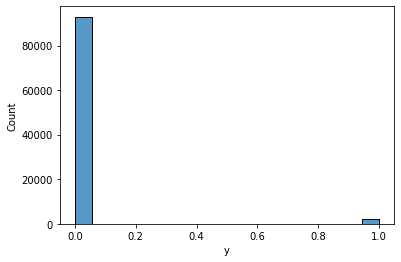

In [13]:
path = './data/'
filename = 'aggnewdataprep'

df = pd.read_csv(path + filename + '.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print('DF ::', df.shape)
#app_potreb_cnt

to_drop = ['y']+[]
sns.histplot(df.y)

In [ ]:
# GOOD CV
y1_idx = df.index[df.y == 1].tolist()
shuffle(y1_idx)
y0_idx = df.index[df.y == 0].tolist()
shuffle(y0_idx)

dfTrain = pd.DataFrame()
dfTest = pd.DataFrame()

dfTrain = pd.concat([df.iloc[y1_idx[0:int(len(y1_idx)/1.5)],:], df.iloc[y0_idx[0:int(len(y0_idx)/1.5)],:]])
dfTest = pd.concat([df.iloc[y1_idx[int(len(y1_idx)/1.5):],:], df.iloc[y0_idx[int(len(y0_idx)/1.5):],:]])

X_train = dfTrain.drop(to_drop, axis=1)
y_train = dfTrain.y

X_test = dfTest.drop(to_drop, axis=1)
y_test = dfTest.y

X_train

In [15]:
#BASELINE XGBOOST

model = XGBClassifier(verbosity = 0, scale_pos_weight=10)
model.fit(X = X_train, y = y_train)

y_pred = model.predict(X_test).tolist()
y_pred = np.array(y_pred)
print('roc_auc :: ', roc_auc_score(y_pred, y_test) )
print('f1 :: ', f1_score(y_pred, y_test))

/home/dan1ar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
roc_auc ::  0.638740939151633
f1 ::  0.20854021847070509


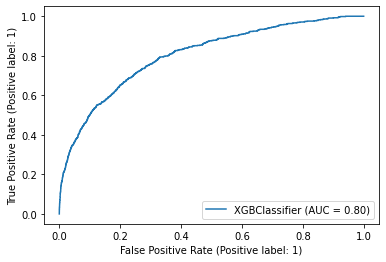

In [16]:
#ROC_CURVE PLOT
plot_roc_curve(model, X_test, y_test)

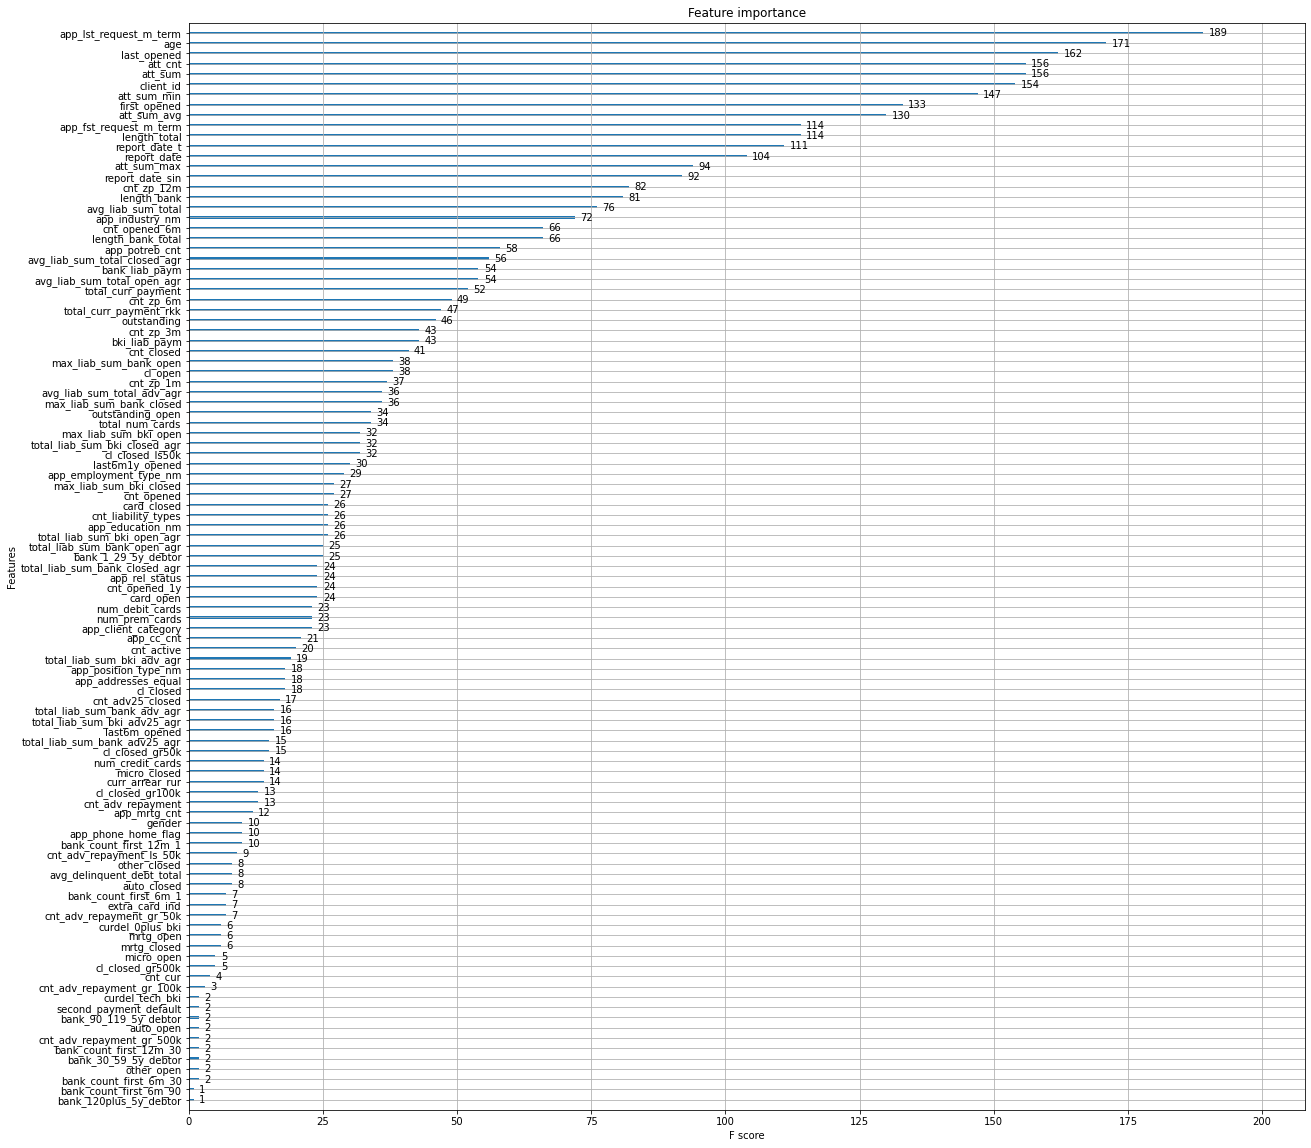

In [17]:
# FEATURE IMPORTANCE
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(20, 20)

features_importance = model.get_booster().get_score(importance_type='weight')

In [18]:
for spw in range(5, 50, 5):
    model = XGBClassifier(verbosity = 0, scale_pos_weight=spw)
    model.fit(X = X_train, y = y_train)

    y_pred = model.predict(X_test).tolist()
    #y_pred = [1 if x[1] > 0.2 else 0 for x in y_pred]
    y_pred = np.array(y_pred)
    print('==============', spw, '===============')
    print('roc_auc :: ', roc_auc_score(y_pred, y_test) )
    print('f1 :: ', f1_score(y_pred, y_test))
    

/home/dan1ar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
============== 5 ===============
roc_auc ::  0.638740939151633
f1 ::  0.20854021847070509
/home/dan1ar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWar

KeyboardInterrupt: 